In [1]:
%pwd

'/home/by783/Self_Jupyter/DL_Final_Project'

In [2]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import re
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  0.4.1
Torchvision Version:  0.2.2


In [2]:
re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", "tensor(0.2332, device='cuda:0', dtype=torch.float64)\n").group(1)

'0.2332'

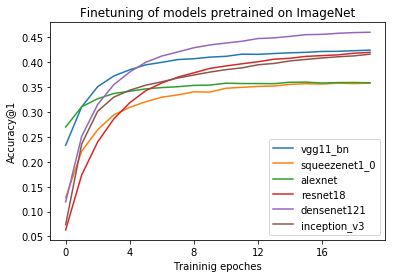

In [4]:
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='../DL_Final_Project_Models'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190421_raw_(.*?).pt_val_acc', scorefilename).group(1)
        #print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),net_score_dict[k],label=k_to_m_dict[k])
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 20, 4.0))
plt.xlabel('Traininig epoches')
plt.title('Finetuning of models pretrained on ImageNet')
plt.legend()
plt.show()

In [41]:
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='../DL_Final_Project_Models'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190421_raw_(.*?).pt_val_acc', scorefilename).group(1)
        #print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

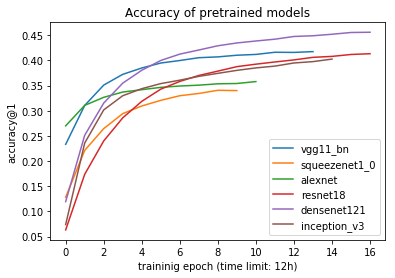

In [42]:
for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),net_score_dict[k],label=k_to_m_dict[k])
plt.ylabel('accuracy@1')
plt.xlabel('traininig epoch (time limit: 12h)')
plt.title('Accuracy of pretrained models')
plt.legend()
plt.show()


In [6]:
os.listdir('../DL_Final_Project_Models')

['190421_raw_vgg.pt_val_acc',
 '190421_raw_squeezenet.pt_val_acc',
 '190421_raw_alexnet.pt_val_acc',
 '190421_raw_densenet.pt',
 '190421_raw_resnet.pt_val_acc',
 '190421_raw_densenet.pt_val_acc',
 '190421_raw_alexnet.pt',
 '190421_raw_inception.pt',
 '190421_raw_squeezenet.pt',
 '190421_raw_inception.pt_val_acc',
 '190421_raw_resnet.pt',
 '190421_raw_vgg.pt']

In [11]:
[re.search(r'190421_raw_(.*?).pt_val_acc', s).group(1) for s in os.listdir('../DL_Final_Project_Models')]

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
with open(fname) as f:
    content = f.readlines()

In [6]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [7]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

In [8]:
def image_loader(path, batch_size):
    transform = transforms.Compose(
        [
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            #https://pytorch.org/docs/stable/torchvision/transforms.html
            # [mean],[std] for different channels
        ]
    )
    sup_train_data = datasets.ImageFolder('{}/{}/train'.format(path, 'supervised'), transform=transform)
    sup_val_data = datasets.ImageFolder('{}/{}/val'.format(path, 'supervised'), transform=transform)
    unsup_data = datasets.ImageFolder('{}/{}/'.format(path, 'unsupervised'), transform=transform)
    # source code: https://github.com/pytorch/vision/blob/master/torchvision/datasets/folder.py
    # Main idea:
    data_loader_sup_train = torch.utils.data.DataLoader(
        sup_train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    data_loader_sup_val = torch.utils.data.DataLoader(
        sup_val_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    data_loader_unsup = torch.utils.data.DataLoader(
        unsup_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    
    print('sup_train_data.class_to_idx==sup_val_data.class_to_idx: ',sup_train_data.class_to_idx==sup_val_data.class_to_idx)
    
    return data_loader_sup_train, data_loader_sup_val, data_loader_unsup, sup_train_data.class_to_idx

In [3]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [11]:
model_name="vgg"
num_classes = 1000
num_epochs = 15

feature_extract = True

loader_image_path='/scratch/by783/DL_Final/ssl_data_96'
loader_batch_size=64

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=

In [13]:
data_loader_sup_train, data_loader_sup_val, data_loader_unsup, class_to_idx_dict = image_loader(loader_image_path,loader_batch_size)
dataloaders={}
dataloaders['train'],dataloaders['val']=data_loader_sup_train, data_loader_sup_val

sup_train_data.class_to_idx==sup_val_data.class_to_idx:  True


In [15]:
model_ft = model_ft.to(device)

In [16]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [17]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/14
----------


KeyboardInterrupt: 

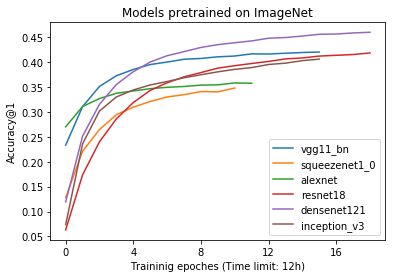

In [61]:
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='../DL_Final_Project_Models'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190421_raw_(.*?).pt_val_acc', scorefilename).group(1)
        #print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),net_score_dict[k],label=k_to_m_dict[k])
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 20, 4.0))
plt.xlabel('Traininig epoches (Time limit: 12h)')
plt.title('Models pretrained on ImageNet')
plt.legend()
plt.show()

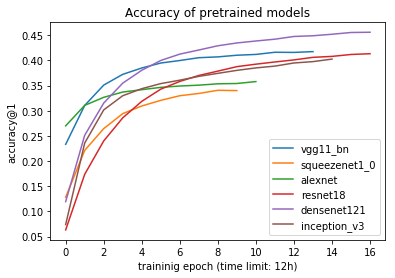

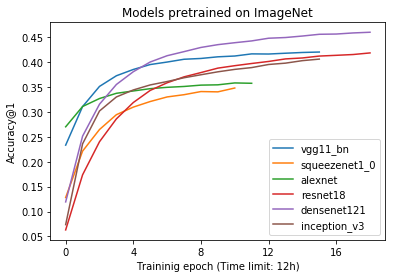